In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

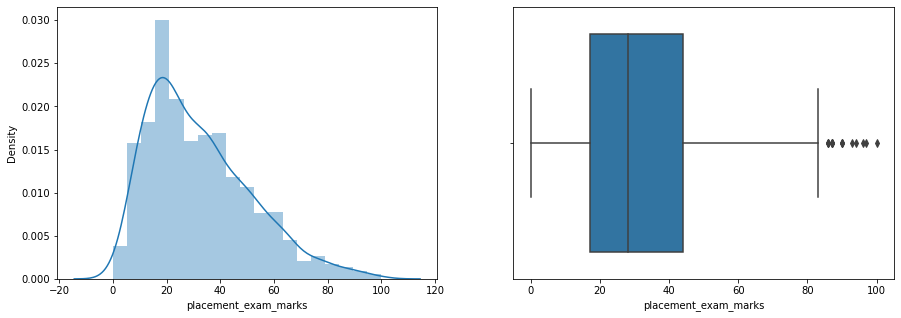

In [5]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.distplot(df['placement_exam_marks'])

plt.subplot(122)
sns.boxplot(df['placement_exam_marks'])

plt.show()

In [6]:
df['placement_exam_marks']=sorted(df['placement_exam_marks'])

In [7]:
#Finding the Quartiles
q1,q3=np.percentile(df['placement_exam_marks'],[25,75]) 
q1,q3

(17.0, 44.0)

In [8]:
# calculating the IQR and the extreme limits

IQR=q3-q1

Lower_fence= q1-(1.5*IQR)                        
Higher_fence= q3+(1.5*IQR)

Lower_fence,Higher_fence

(-23.5, 84.5)

In [9]:

df[(df['placement_exam_marks']> Higher_fence) | (df['placement_exam_marks']< Lower_fence)]

,cgpa,placement_exam_marks,placed
985,7.10,86.0,0
986,7.09,86.0,1
987,6.77,86.0,0
988,5.64,87.0,1
989,6.23,87.0,0
990,6.17,87.0,1
991,7.04,87.0,0
992,6.26,90.0,0
993,6.73,90.0,1
994,6.48,90.0,0


In [10]:
# Removing the Outliers
df_new = df[(df['placement_exam_marks']<Higher_fence) & (df['placement_exam_marks']> Lower_fence)]
df_new.shape

(985, 3)

In [11]:
df_new['placement_exam_marks'].describe()

count    985.000000
mean      31.339086
std       17.857633
min        0.000000
25%       17.000000
50%       28.000000
75%       43.000000
max       83.000000
Name: placement_exam_marks, dtype: float64

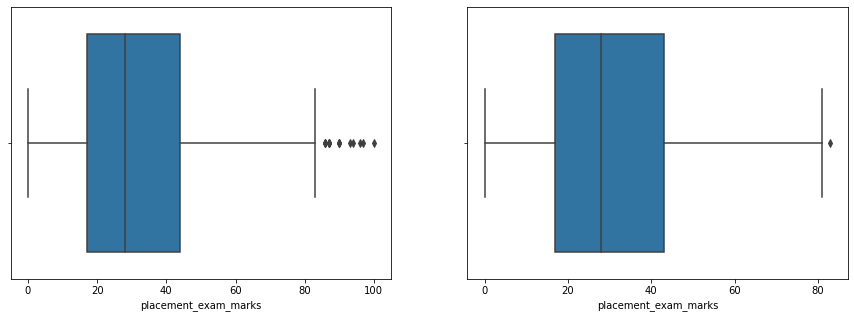

In [12]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(122)
sns.boxplot(df_new['placement_exam_marks'])

plt.show()

In [13]:
# Capping the Outliers with extreme values

df_new_cap = df.copy()

df_new_cap['placement_exam_marks'] = np.where(
    df_new_cap['placement_exam_marks'] > Higher_fence,
    Higher_fence,
    np.where(
        df_new_cap['placement_exam_marks'] < Lower_fence,
        Lower_fence,
        df_new_cap['placement_exam_marks']
    )
)

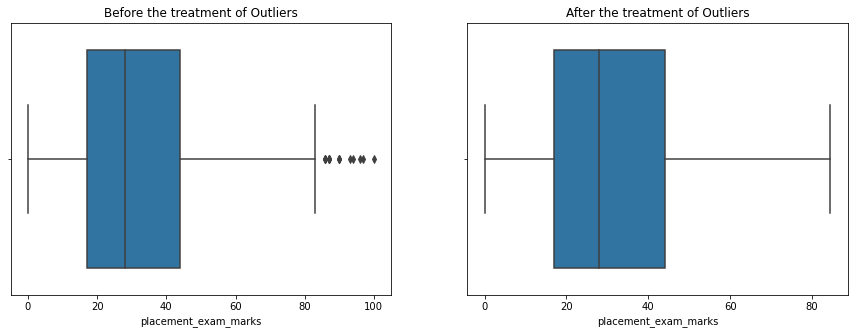

In [14]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df['placement_exam_marks'])
plt.title('Before the treatment of Outliers')

plt.subplot(122)
sns.boxplot(df_new_cap['placement_exam_marks'])
plt.title('After the treatment of Outliers')

plt.show()